# Netflix TV Series: A Recommender System Analysis

Recommender Systems is a Machine Learning technique that is common to analyze data from e-commerce, books, movies, behavior on LinkedIn or Facebook, etc. The application of recommender systems captures the behavior of people or things. There are 2 common types of recommender systems, including content-based recommender systems and collaborative filtering. In this Netflix TV Series notebook, I focus on content-based recommender systems. The question to be answered is what series to watch next according to genre?

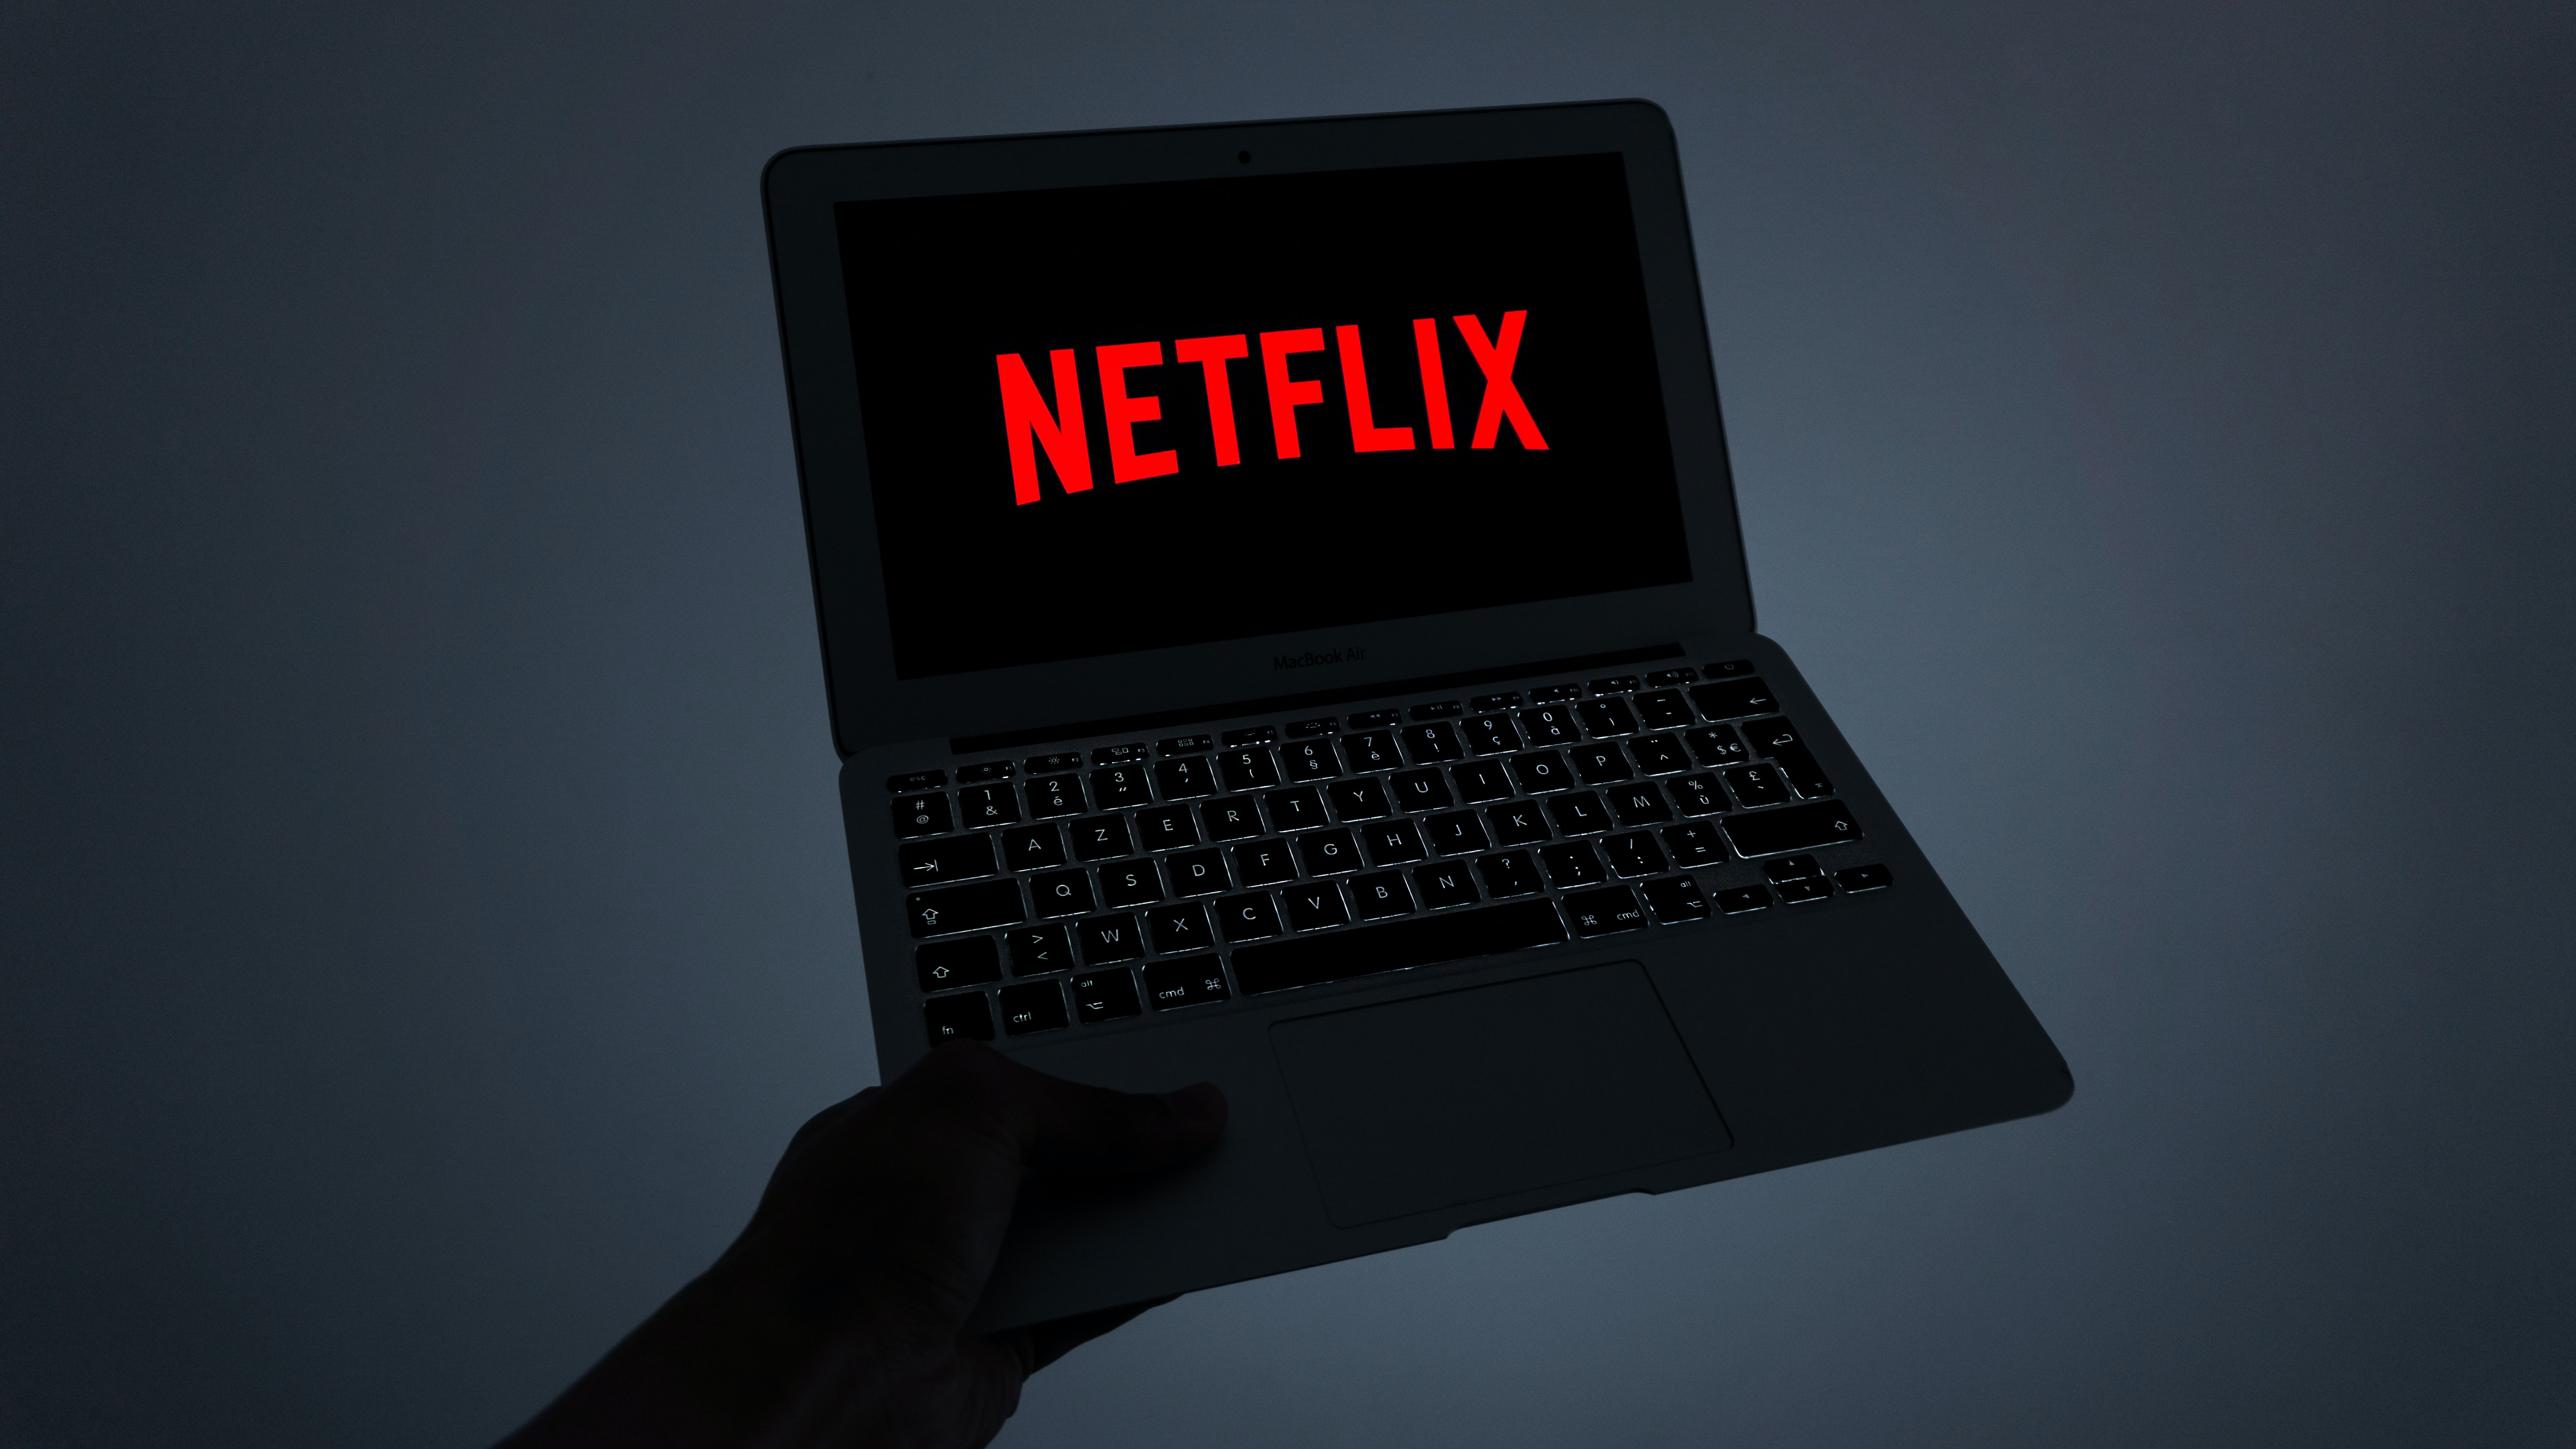

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-and-amazon-prime-tv-series-dataset/tv_shows_data.csv


In [2]:
#import other packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/kaggle/input/netflix-and-amazon-prime-tv-series-dataset/tv_shows_data.csv'

df = pd.read_csv(path)

In [4]:
df.head(5)

,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
0,Stranger Things,Science Fiction Horror,"July 15, 2016",3,25
1,The Crown,Historical Drama,"November 4, 2016",4,40
2,Ozark,Crime Drama,"July 21, 2017",3,30
3,Lost in Space,Science Fiction,"April 13, 2018",2,20
4,Narcos: Mexico,Crime Drama,"November 16, 2018",2,20


### Descriptive Statistics: Netflix TV Series Dataset

How many Netflix TV Series have been included? And how many unique genres are there? Which genre has the most TV series?

In [5]:
#How many Netflix series titles are included?
len(df)

641

In [6]:
#What are the unique genres included in the dataset?
df.Genre.unique()

array(['Science Fiction Horror', 'Historical Drama', 'Crime Drama',
       'Science Fiction', 'Superhero Action', 'Zombie Drama',
       'Science Fiction Drama', 'Police Procedural Anthology Series',
       'Superhero Science Fiction Drama', 'Romantic Drama',
       'Fantasy Drama', 'Horror Teen Drama', 'Fantasy',
       'Coming Of Age Drama', 'Romance Drama', 'Teen Drama',
       'Anthology Series', 'Detective Drama', 'Drama', 'Horror',
       'Romance', 'Biopic', 'Teen Drama Fantasy', 'Comedy Drama',
       'Comedy', 'Satire Drama', 'Coming Of Age Comedy', 'Sketch Comedy',
       'Dark Comedy', 'Black Comedy Drama', 'Sitcom', 'Dramedy',
       'Musical Comedy', 'Medieval Fantasy Comedy', 'Anthology',
       'Mockumentary', 'Science Fantasy Dark Comedy', 'War Drama',
       'Dark Fantasy', 'Suspense', 'Workplace Comedy',
       "Children'S Series", 'Disaster', 'Dark Fantasy Adventure',
       'Fantasy Action', 'Romantic Comedy', 'Supernatural Drama',
       'Thriller', 'Police Procedu

In [7]:
#How many series are included per genre?
df.Genre.value_counts()

Docu Series            78
Comedy                 60
Drama                  35
Comedy Drama           30
Crime Drama            25
                       ..
Supernatural Horror     1
Zombie Drama            1
Making Of               1
Superhero Action        1
Mystery Thriller        1
Name: Genre, Length: 171, dtype: int64

Text(0.5, 1.0, 'Netflix TV Series Genre')

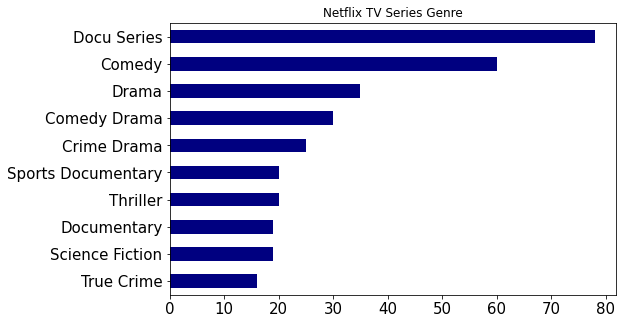

In [8]:
df.Genre.value_counts()[0:10].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()
plt.title("Netflix TV Series Genre")

The Docu Series genre has the most TV series on Netflix according to the data. Let's randomly pick the first TV series with the genre *'Docu Series'*.

In [9]:
Documentary = df[(df.Genre == 'Docu Series')]
Documentary.head(1)

,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
158,Dogs,Docu Series,"November 16, 2018",1,6


The *'Docu Series' Dogs*  is the first TV series within the genre. It has 1 season and the number of episodes equals 6.

### Which Netflix TV Series is recommended to watch next?

Let's analyze which Netflix TV Series is recommended to watch next. Previously, we saw that there are many unique genres (although most genres have lots in common). The genre with the highest number of TV Series on Netflix is the *'Docu Series'*. Based on its content, which TV series is recommended to watch next? To determine the TV series to watch next on Netflix, I use content-based recommender systems as machine learning technique. 

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
#Replace NaN with an empty string
df.Title = df.Title.fillna('')
df.Genre = df.Genre.fillna('')

In [12]:
#Make a vector matrix with the title of the Netflix tv series
count_series = CountVectorizer()
count_series_matrix = count_series.fit_transform(df.Title)

In [13]:
# Compute the cosine similarity matrix to compare the similarities in tv series
cosine_sim = linear_kernel(count_series_matrix, count_series_matrix)

In [14]:
indices = pd.Series(df['Title'])
indices[:10]

0         Stranger Things
1               The Crown
2                   Ozark
3           Lost in Space
4          Narcos: Mexico
5    The Umbrella Academy
6            Black Summer
7            Another Life
8            Criminal: UK
9            Raising Dion
Name: Title, dtype: object

In [15]:
#build a recommender system
def get_recommendations(title, cosine_sim = cosine_sim):
    recommended_series = []
    idx = indices[indices == 'Title'].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_series.append(list(df['Title'])[i])
        
    return recommended_series

Now, let's recommend a TV show to watch next on Netflix. Assume that we have already watched the *Docu Series Dogs*. This show was listed first. 

In [16]:
get_recommendations('Dogs')

['Title',
 'Stranger Things',
 'Girls Incarcerated',
 'Wild Wild Country',
 'Rapture',
 'Bobby Kennedy for President',
 "Evil Genius: The True Story of America's Most Diabolical Bank Heist",
 'Explained',
 'November 13: Attack on Paris',
 'Dark Tourist']

**What are the first 5 TV Series Recommendations?**

In [17]:
five_recommendations = ['Girls Incarcerated','Wild Wild Country','Rapture','Bobby Kennedy for President',"Evil Genius: The True Story of America's Most Diabolical Bank Heist"]

df_five_recommendations = df[df.Title.isin(five_recommendations)]
df_five_recommendations

,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
424,Girls Incarcerated,Documentary,"March 2, 2018",2,16
425,Wild Wild Country,Documentary,"March 16, 2018",6,unknown
426,Rapture,Documentary,"March 30, 2018",1,8
427,Bobby Kennedy for President,History,"April 27, 2018",4,unknown
428,Evil Genius: The True Story of America's Most ...,True Crime,"May 11, 2018",4,unknown


**And how about all recommended TV Series?**

In [18]:
all_recommendations = ['Girls Incarcerated',
 'Wild Wild Country',
 'Rapture',
 'Bobby Kennedy for President',
 "Evil Genius: The True Story of America's Most Diabolical Bank Heist",
 'Explained',
 'November 13: Attack on Paris',
 'Dark Tourist']

df_recommendations = df[df.Title.isin(all_recommendations)]
df_recommendations

,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
424,Girls Incarcerated,Documentary,"March 2, 2018",2,16
425,Wild Wild Country,Documentary,"March 16, 2018",6,unknown
426,Rapture,Documentary,"March 30, 2018",1,8
427,Bobby Kennedy for President,History,"April 27, 2018",4,unknown
428,Evil Genius: The True Story of America's Most ...,True Crime,"May 11, 2018",4,unknown
429,Explained,Docu Series,"May 23, 2018",2,30
430,November 13: Attack on Paris,Documentary,"June 1, 2018",3,unknown
431,Dark Tourist,Travel Documentary,"July 20, 2018",1,8


Based on the content-based recommender systems machine learning technique, I conclude to watch the Netflix TV Series listed above next. So, for example, let's watch *Wild Wild Country*, *Rapture*, or *Dark Tourist*. All series have the genre in common, or the genre is somewhat related: Docu Series, Documentary, Travel Documentary, History.

**This is the end of the Content-Based Recommender System analysis for Netflix TV Series. Hope you enjoyed it!**